In [1]:
# Imports and untilities from functions.ipynb

%run functions.ipynb

In [2]:
data_complete = pd.read_csv(rf'{export_data}results_experiment_valid.csv', sep=";")

display(data_complete)

,BlockId,CommitResultDate,Condition,EndInteractionDate,ExpectedResultLayer,ExpectedResultNumber,LayerNumberConfiguration,ProbandId,ProvidedResultLayer,ProvidedResultNumber,...,TrialNumber,CleanedUpInteractionStart_DT,CleanedUpInteractionEnd_DT,ResultNumberDifference,ResultLayerDifference,ResultLayerCorrect,ResultNumberCorrect,DurationMS,DurationMS_Cleaned,countCondition
0,0,2022-08-01T14:15:22.795Z,No Feedback,2022-08-01T14:15:19.119Z,5,166,"[136, 147, 130, 139, 166, 150, 132]",2,5,166,...,0,2022-08-01 14:14:05.504,2022-08-01 14:15:18.527,0,0,True,True,78.538,73.023,2
1,0,2022-08-01T14:16:08.915Z,No Feedback,2022-08-01T14:16:03.467Z,3,165,"[122, 147, 165, 150, 129, 138, 149]",2,3,165,...,1,2022-08-01 14:15:26.143,2022-08-01 14:16:00.890,0,0,True,True,40.671,34.747,3
2,0,2022-08-01T14:17:10.611Z,No Feedback,2022-08-01T14:17:06.246Z,5,154,"[148, 130, 142, 149, 154, 131, 147]",2,4,154,...,2,2022-08-01 14:16:10.883,2022-08-01 14:17:05.397,0,-1,False,True,57.331,54.514,4
3,0,2022-08-01T14:18:09.619Z,No Feedback,2022-08-01T14:18:05.670Z,3,164,"[141, 132, 164, 110, 152, 147, 154]",2,3,164,...,3,2022-08-01 14:17:11.970,2022-08-01 14:18:04.603,0,0,True,True,55.058,52.633,5
4,0,2022-08-01T14:19:06.811Z,No Feedback,2022-08-01T14:19:02.997Z,7,154,"[142, 148, 140, 143, 144, 132, 154]",2,7,154,...,4,2022-08-01 14:18:11.962,2022-08-01 14:19:02.010,0,0,True,True,53.376,50.048,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,3,2022-08-23T11:27:13.692Z,No Feedback,2022-08-23T11:27:09.628Z,7,159,"[153, 122, 128, 144, 140, 154, 159]",23,7,159,...,79,2022-08-23 11:26:33.878,2022-08-23 11:27:08.564,0,0,True,True,37.272,34.686,501
1760,3,2022-08-23T11:27:49.516Z,No Feedback,2022-08-23T11:27:45.172Z,5,157,"[146, 142, 133, 156, 157, 128, 138]",23,5,157,...,80,2022-08-23 11:27:15.467,2022-08-23 11:27:44.655,0,0,True,True,31.479,29.188,502
1761,3,2022-08-23T11:28:51.795Z,No Feedback,2022-08-23T11:28:46.148Z,6,148,"[139, 140, 143, 147, 142, 148, 141]",23,6,148,...,81,2022-08-23 11:27:50.891,2022-08-23 11:28:45.618,0,0,True,True,56.632,54.727,503
1762,3,2022-08-23T11:29:32.908Z,No Feedback,2022-08-23T11:29:29.764Z,1,152,"[152, 139, 138, 134, 145, 144, 148]",23,1,152,...,82,2022-08-23 11:28:54.105,2022-08-23 11:29:28.940,0,0,True,True,37.968,34.835,504


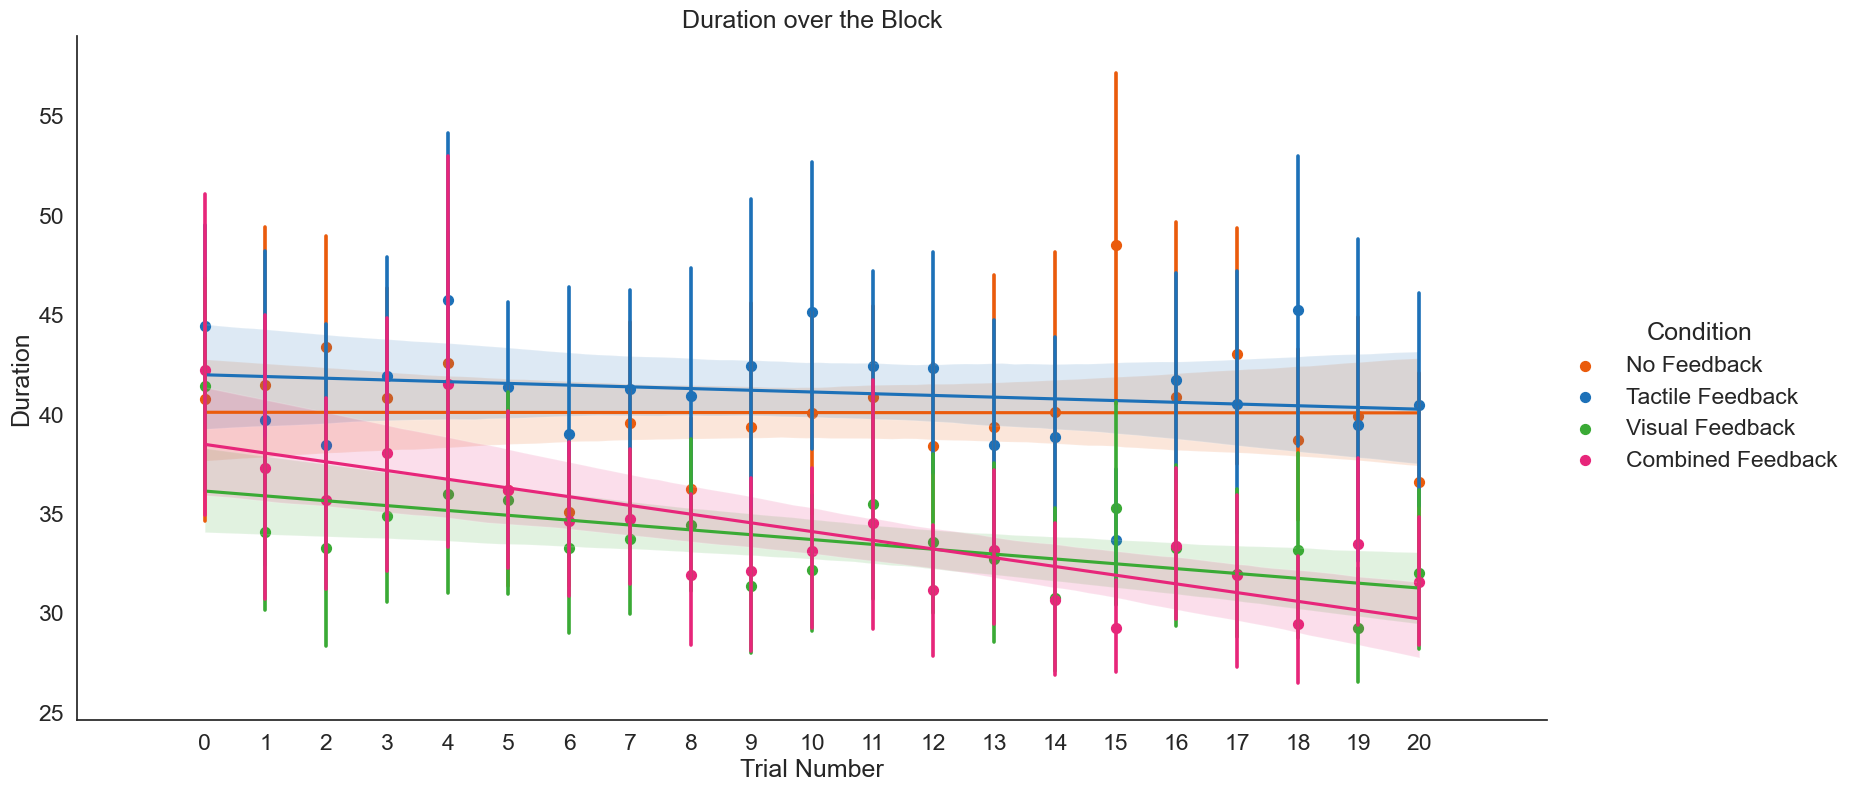

In [3]:

sns.set_theme(font_scale = 1.5, palette=['#ea5b0c', '#1d71b8', '#3aaa35', '#e7267a'])
sns.set_style("white")
g = sns.lmplot(x='TrialId', y='DurationMS', hue='Condition', hue_order=condition_names, data = data_complete, height=8, aspect=2, x_estimator=np.mean, x_ci='ci', scatter=True, x_jitter=0.5, y_jitter=0.5)
g.set(title=f'Duration over the Block')    
g.set(xlabel='Trial Number')
g.set(ylabel='Duration')
g.set(xticks=np.arange(0, 21, step=1))

for ax in plt.gcf().axes:
    add_margin(ax,x=0.05,y=0.01)

# g.savefig(rf'{export_img}{filePrefix}_trialsBlock-reg.png')
# g.savefig(rf'{export_img}{filePrefix}_trialsBlock-reg.svg')

# for ax in plt.gcf().axes:
#     l = ax.get_xlabel()
#     ax.set_xlabel(l, fontsize=15)
#     l = ax.get_ylabel()
#     ax.set_ylabel(l, fontsize=15)

plt.show()

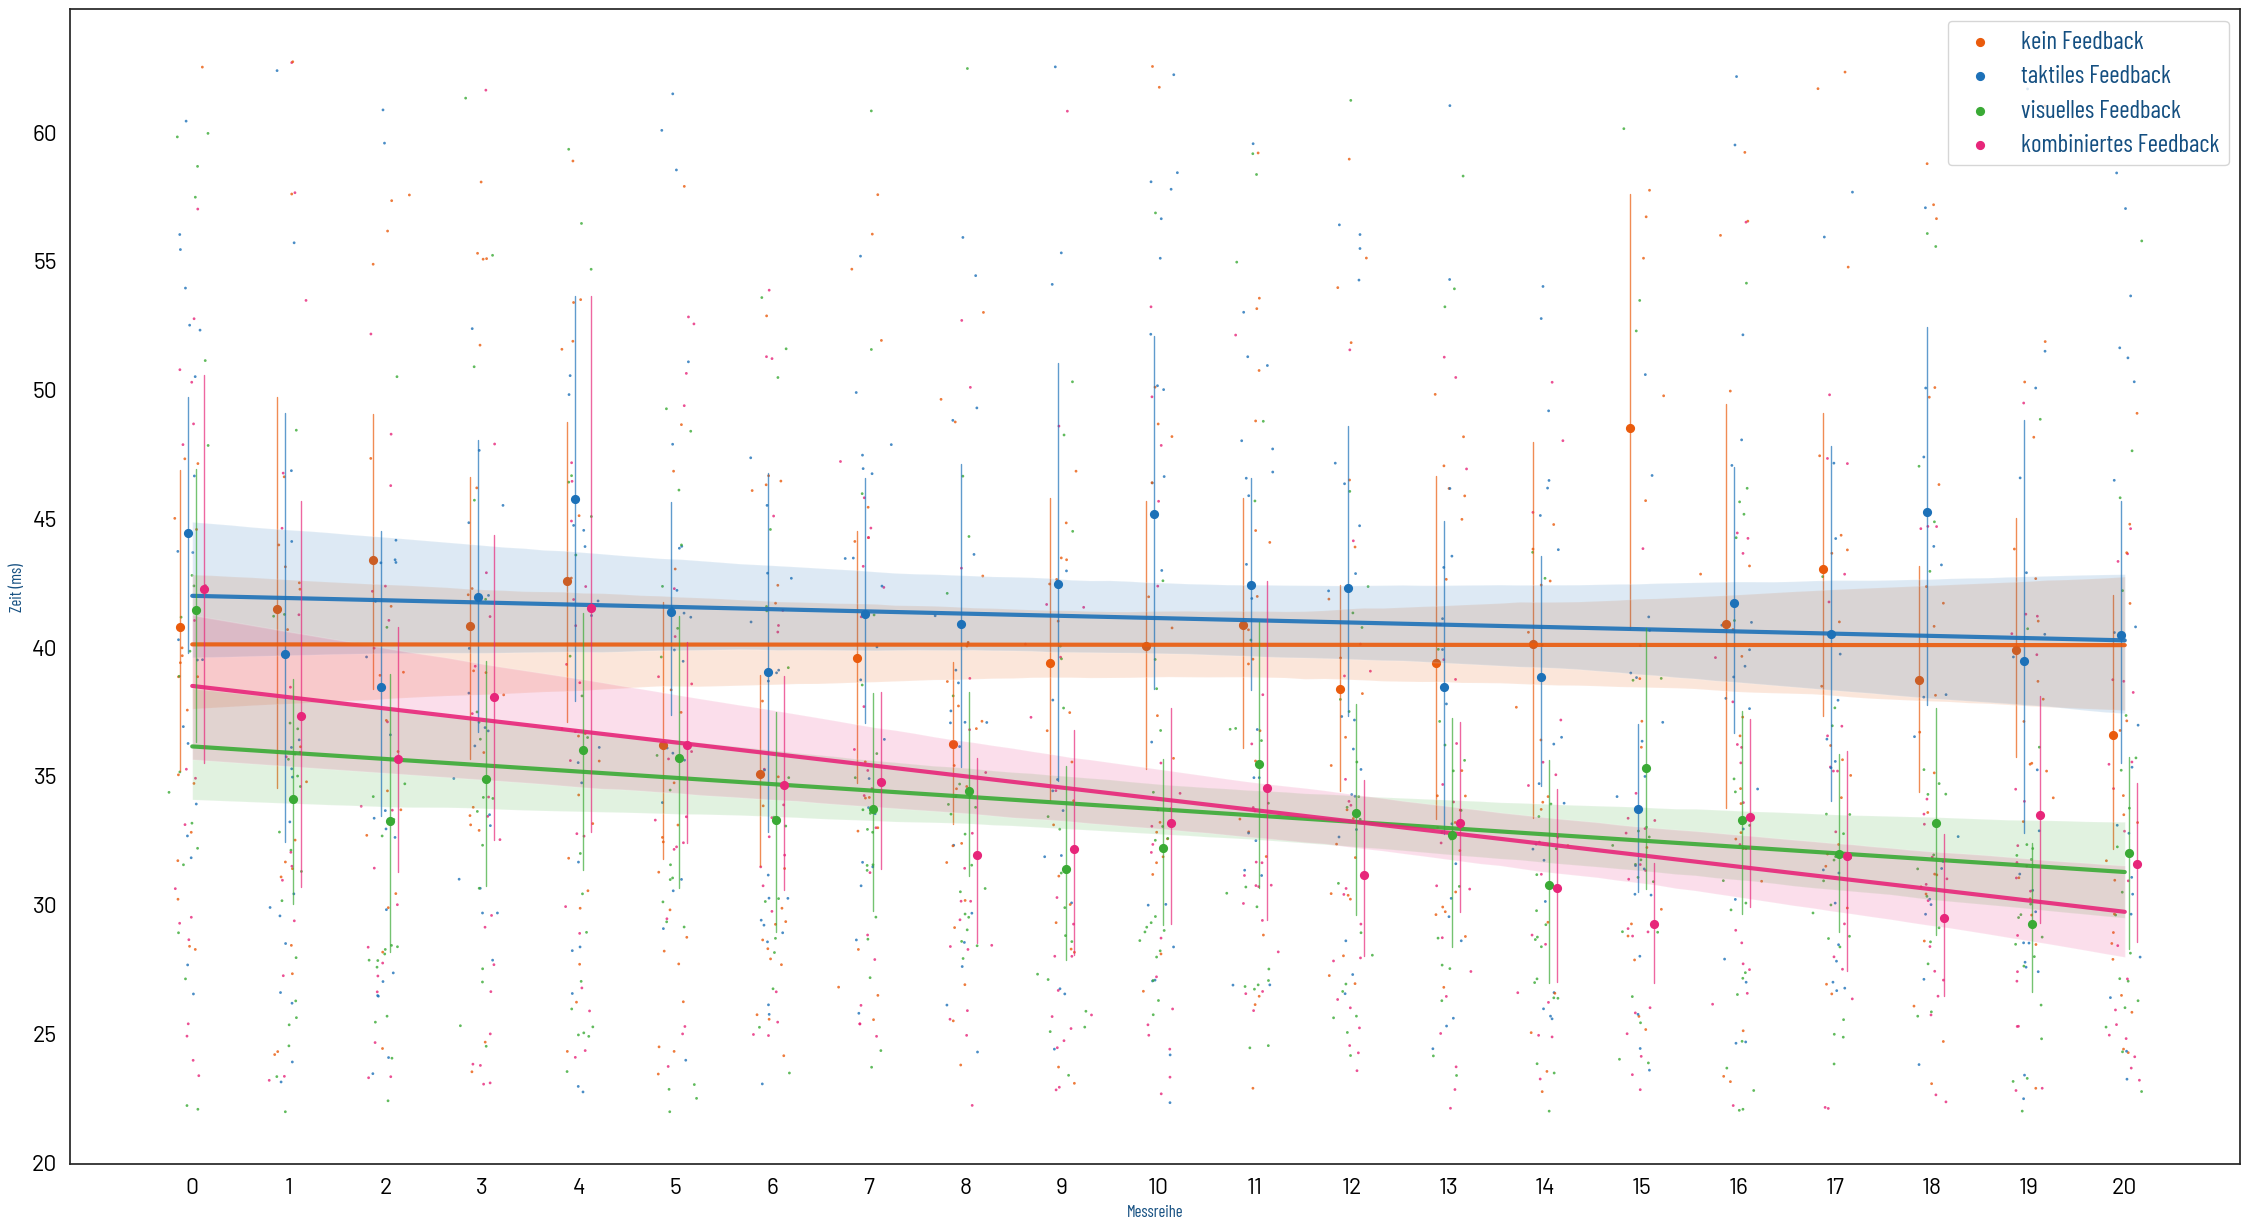

In [13]:
# Kombinierter Plot: Scatter + Pointplot + Regressionen
fig, ax = plt.subplots(figsize=(28, 15))

sns.set_theme(font_scale = 1.5, palette=['#ea5b0c', '#1d71b8', '#3aaa35', '#e7267a'])
sns.set_style("white")

rng = np.random.default_rng(0)
data_complete["x_jitter"] = data_complete["TrialId"] + rng.normal(0, 0.1, size=len(data_complete))

lo, hi = data_complete["DurationMS"].quantile([0.05, 0.95])
df_scatter = data_complete[(data_complete["DurationMS"] >= lo) & (data_complete["DurationMS"] <= hi)]


sns.scatterplot(
    data=df_scatter,
    x="x_jitter",
    y="DurationMS",
    hue="Condition",
    hue_order=condition_names,    
    alpha=0.8,
    s=4,
    linewidth=0,
    ax=ax,
    legend=False,     # Legend kommt vom pointplot
    zorder=1
)

# 1) Pointplot mit Estimator-Linien (ohne Scatter)
sns.pointplot(
    data=data_complete,
    x="TrialId",
    y="DurationMS",
    hue="Condition",
    hue_order=condition_names,
    estimator=np.mean,     # exakt wie lmplot(x_estimator=np.mean)
    errorbar=("ci", 95),   # bei älterem seaborn: ci=95    
    join=False,
    dodge=0.25,           
    markers="o",
    scale=0.75,
    ax=ax)

for line in ax.lines:         
    line.set_linewidth(1)
    line.set_alpha(0.7)

# 2 Regression pro Condition auf ECHTEM x (ohne Scatter)
for cond in condition_names:
    sns.regplot(
        data=data_complete[data_complete["Condition"] == cond],
        x="TrialId",
        y="DurationMS",
        scatter=False,
        line_kws={"linewidth": 3.0, "alpha": 0.9},
        ci=95,        # oder ci=None, je nachdem ob du das Band willst
        ax=ax
    )

# Legend: doppelte Einträge vermeiden (optional hübscher machen)
handles, labels = ax.get_legend_handles_labels()
# scatterplot erzeugt meist eine Legend, regplot nicht; falls doppelt: hier bereinigen
legend = ax.legend(handles=handles, labels=['kein Feedback', 'taktiles Feedback', 'visuelles Feedback', 'kombiniertes Feedback'])

for txt in legend.get_texts():
    txt.set_fontname("Barlow Condensed")
    txt.set_color('#144f81')
    txt.set_fontsize(18)

ax.set_xlabel(
    "Messreihe",
    color='#144f81',
    fontname="Barlow Condensed",
    fontsize=12
)

ax.set_ylabel(
    "Zeit (ms)",
    color='#144f81',
    fontname="Barlow Condensed",
    fontsize=12
)

ax.tick_params(axis="both", labelcolor='#000000')
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontname("Barlow")


fig.savefig(rf'{export_img}duration_regression_trialsBlock-reg.svg')
plt.show()